### Importing required moudules

In [128]:
#Data preprocessing 
import numpy as np
import pandas as pd
from imblearn.combine import SMOTETomek

#Data analysis
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

#Extra
import os
import pickle
import warnings
warnings.filterwarnings("ignore")

### Setting enviornment 

In [121]:
def setEnviornment(seed):
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    sns.set_style("dark")
    np.random.seed(seed)
    random_state = seed
    return random_state
setEnviornment(42)

42

### Loading data

In [3]:
data = pd.read_csv("../input/data2.csv")
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,6,6,6.000000,0.000000,3.132505e+02,52.208416,38308.000000,0.000000,38308,38308,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0,0,0,20,20,26.104208,26.104208,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.000000,20,0,0,0,0,0,0,1,6,1,6,255,946,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,163,0,65.200000,89.278777,1.039666e+06,33402.922760,31.933333,25.510409,73,0,479,47.900000,38.942836,109,1,401,100.250000,101.736178,237,3,0,0,0,0,368,176,22964.509390,10438.413360,0,163,29.294118,56.529599,3195.595588,0,0,0,1,0,0,0,0,0,31.125000,15.636364,65.200000,368,0,0,0,0,0,0,11,172,5,326,29200,260,4,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,1575,0,525.000000,813.326503,5.753425e+06,14611.872150,73.000000,204.960972,810,1,1095,121.666667,298.746130,915,1,995,199.000000,345.535092,810,3,0,0,0,0,336,208,9132.420091,5479.452055,0,1575,370.588235,671.751541,451250.132400,0,0,0,1,0,0,0,0,0,393.750000,315.000000,525.000000,336,0,0,0,0,0,0,10,3150,6,3150,29200,2081,3,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,3069,0,555.000000,977.480342,6.650007e+05,1907.141918,543.071429,2519.931377,13391,0,15206,950.375000,3322.417812,13391,2,15112,1373.818182,4176.449588,13961,3,0,0,0,0,560,388,1117.979745,789.162173,0,3069,337.066667,704.654082,496537.374700,0,0,0,1,0,0,0,0,0,348.689655,203.058823,555.000000,560,0,0,0,0,0,0,17,3452,12,6660,29200,0,10,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,1576,0,525.333333,813.842901,5.771062e+06,13736.263740,78.000000,207.000929,794,1,1092,136.500000,313.850738,910,1,1015,203.000000,333.240154,794,3,0,0,0,0,304,208,8241.758242,5494.505495,0,1576,393.875000,704.585067,496440.116700,0,0,0,1,0,0,0,0,0,420.133333,350.000000,525.333333,304,0,0,0,0,0,0,9,3150,6,3152,29200,2081,2,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


### Data exploration 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             692703 non-null  int64  
 1    Flow Duration                692703 non-null  int64  
 2    Total Fwd Packets            692703 non-null  int64  
 3    Total Backward Packets       692703 non-null  int64  
 4   Total Length of Fwd Packets   692703 non-null  int64  
 5    Total Length of Bwd Packets  692703 non-null  int64  
 6    Fwd Packet Length Max        692703 non-null  int64  
 7    Fwd Packet Length Min        692703 non-null  int64  
 8    Fwd Packet Length Mean       692703 non-null  float64
 9    Fwd Packet Length Std        692703 non-null  float64
 10  Bwd Packet Length Max         692703 non-null  int64  
 11   Bwd Packet Length Min        692703 non-null  int64  
 12   Bwd Packet Length Mean       692703 non-nul

In [5]:
data.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,692703.000000,6.927030e+05,692703.000000,692703.000000,6.927030e+05,6.927030e+05,692703.000000,692703.000000,692703.000000,692703.000000,692703.000000,692703.000000,692703.000000,692703.000000,6.916950e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,692703.000000,692703.0,692703.0,692703.0,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,692703.000000,692703.000000,692703.000000,692703.000000,6.927030e+05,692703.000000,692703.000000,692703.000000,692703.000000,692703.000000,692703.000000,692703.0,692703.000000,692703.000000,692703.000000,692703.000000,692703.000000,6.927030e+05,692703.0,692703.0,692703.0,692703.0,692703.0,692703.0,692703.000000,6.927030e+05,692703.000000,6.927030e+05,692703.000000,692703.000000,692703.000000,692703.000000,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05
mean,5686.869462,2.800168e+07,9.556261,10.214079,5.550930e+02,1.699644e+04,233.593936,15.022183,60.555440,82.895863,1661.546313,33.832924,551.940841,658.636320,inf,inf,2.502809e+06,6.844318e+06,2.289307e+07,2.224592e+05,2.774476e+07,5.069287e+06,9.016685e+06,2.279837e+07,1.030778e+06,1.386407e+07,2.647068e+06,3.522882e+06,9.305284e+06,9.268549e+05,0.042201,0.0,0.0,0.0,2.420580e+02,2.492460e+02,9.545305e+04,4.052544e+03,13.723771,1725.129073,278.246605,523.265612,8.876018e+05,0.097301,0.042201,0.000338,0.193693,0.418049,0.066372,0.0,0.000339,0.556957,305.664882,60.555440,551.940841,2.420580e+02,0.0,0.0,0.0,0.0,0.0,0.0,9.556261,5.550930e+02,10.214079,1.699489e+04,5299.671256,1476.643078,6.121279,26.761141,9.224478e+04,4.760852e+04,1.627363e+05,6.315186e+04,2.211122e+07,4.743744e+05,2.252174e+07,2.173373e+07
std,15727.423560,4.276680e+07,747.197814,984.204633,6.163663e+03,2.241175e+06,603.751856,51.068835,157.643794,226.126084,2613.924428,64.586498,797.449564,1098.043102,NaN,NaN,5.595945e+06,1.175401e+07,3.839395e+07,3.673248e+06,4.277094e+07,1.103613e+07,1.600574e+07,3.843629e+07,8.866760e+06,3.335293e+07,9.593760e+06,1.073828e+07,2.616633e+07,8.107914e+06,0.201048,0.0,0.0,0.0,1.564277e+04,1.968957e+04,3.198607e+05,3.091927e+04,27.521716,2634.372188,369.130494,783.442461,1.748895e+06,0.296368,0.201048,0.018376,0.395192,0.493239,0.248931,0.0,0.018416,0.570734,398.045939,157.643794,797.449564,1.564277e+04,0.0,0.0,0.0,0.0,0.0,0.0,747.197814,6.163663e+03,984.204633,2.240953e+06,11869.737394,7315.272621,715.155068,6.322368,7.007049e+05,4.742081e+05,1.094616e+06,6.051023e+05,3.812415e+07,4.488512e+06,3.848292e+07,3.807725e+07
min,0.000000,-1.000000e+00,1.000000,

### Data preprocessing 

In [6]:
#removing the extra spaces from the column names
data.columns = data.columns.str.strip()

In [7]:
#Checking for duplicates
def duplicateProcess(data):
    u,d = data.duplicated().value_counts().values
    print(f"unique records:{u} | {np.round(u/len(data),2)}%\nduplicate records:{d} | {np.round(d/len(data),2)}%")
    data.drop_duplicates(inplace=True)
    print("\nduplicate records dropped successively")

In [8]:
duplicateProcess(data)

unique records:610794 | 0.88%
duplicate records:81909 | 0.12%

duplicate records dropped successively


In [9]:
#Checking for infinity values
def infProcess(data):
    review = data.drop(columns=["Label"])
    infs = np.isinf(review.values).sum()
    print(f"infinity values:{infs}")
    data = data.replace([np.inf,-np.inf],np.nan,inplace=True)
    print("infinity values replaced with nan")

In [10]:
infProcess(data)

infinity values:543
infinity values replaced with nan


In [11]:
#Checking for null values
def nullProcess(data):
    nulls = data.isnull().sum().sum()
    print(f"null values:{nulls} | {np.round(nulls/len(data),4)*100}%")
    flag = True if nulls/len(data)*100<=10 else False
    if flag:
        data.dropna(inplace=True)
    print("null values dropped")

In [12]:
nullProcess(data)

null values:604 | 0.1%
null values dropped


Feature label seperation 

In [32]:
X = data.drop(columns="Label")
y = data.Label
X.shape, y.shape

((610492, 78), (610492,))

Imbalance data processing

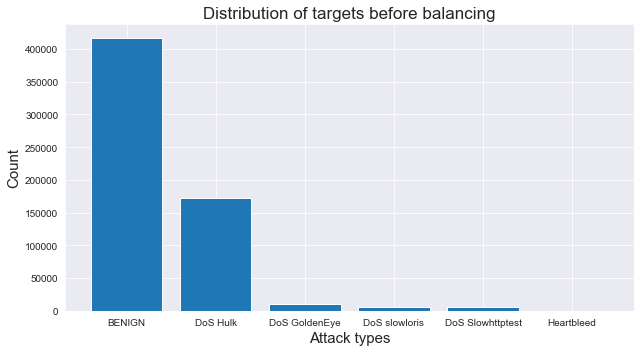

In [72]:
plt.figure(figsize=(9,5))
plt.bar(y.value_counts().index,
        y.value_counts().values)
plt.title("Distribution of targets before balancing",fontdict={"fontsize":17})
plt.xlabel("Attack types",fontdict={"fontsize":15})
plt.ylabel("Count",fontdict={"fontsize":15})
plt.grid()
plt.tight_layout()
plt.show()

In [103]:
y[y!="BENIGN"]="MALWARE"

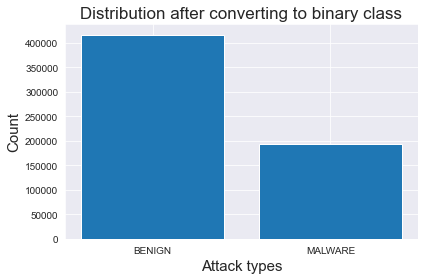

In [112]:
plt.bar(y.value_counts().index,
        y.value_counts().values)
plt.title("Distribution after converting to binary class",fontdict={"fontsize":17})
plt.xlabel("Attack types",fontdict={"fontsize":15})
plt.ylabel("Count",fontdict={"fontsize":15})
plt.grid()
plt.tight_layout()
plt.show()

In [124]:
#taking too much time

# smotetomek = SMOTETomek(random_state=42)
# X_resampled, y_resampled = smotetomek.fit_resample(X, y)

#X,y = X_resampled, y_resampled
# plt.bar(y.value_counts().index,
#         y.value_counts().values)
# plt.title("Distribution after balancing",fontdict={"fontsize":17})
# plt.xlabel("Attack types",fontdict={"fontsize":15})
# plt.ylabel("Count",fontdict={"fontsize":15})
# plt.grid()
# plt.tight_layout()
# plt.show()

### Saving data

In [129]:
data = {"features":X,"targets":y}

file_path = 'C:\Data\Study\Ai_adventures\Projects\Deep _Learning\Android-Malware Detection\outputs\processed_data.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(data, file)